In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Importing Packages

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Cleaning

In [4]:
#Customer ID is not needed
df.drop(columns=['customerID'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isnull().sum()
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df = df[df.TotalCharges!=' ']
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [10]:
df[df.Churn == "No"].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [11]:
tenure_churn_yes =  df[df.Churn == "Yes"].tenure
tenure_churn_no = df[df.Churn == "No"].tenure

Text(0.5, 1.0, 'Distribution of Tenure for Churned and Non-Churned Customers')

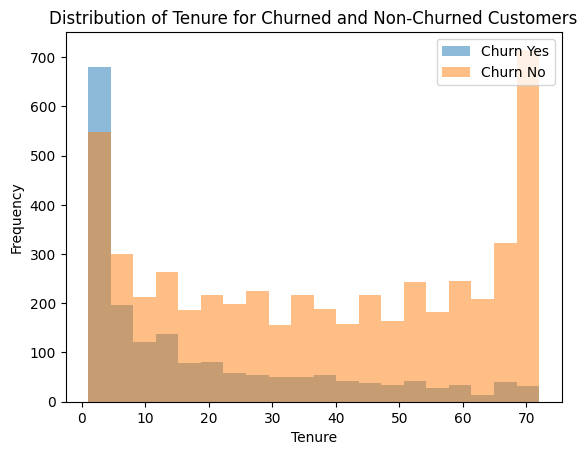

In [12]:
plt.hist(tenure_churn_yes, bins=20, alpha=0.5, label='Churn Yes')
plt.hist(tenure_churn_no, bins=20, alpha=0.5, label='Churn No')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Tenure for Churned and Non-Churned Customers')

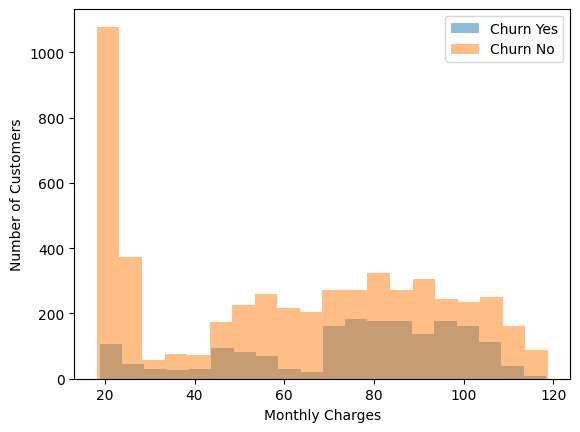

In [13]:
mc_churn_yes = df[df.Churn == "Yes"].MonthlyCharges
mc_churn_no = df[df.Churn == "No"].MonthlyCharges
plt.hist(mc_churn_yes, bins=20,alpha=0.5, label='Churn Yes')
plt.hist(mc_churn_no, bins=20,alpha=0.5, label='Churn No')
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


In [14]:
def unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f"{col} : {df[col].unique()}")

In [15]:
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df.replace("No internet service", "No", inplace=True)
df.replace("No phone service", "No", inplace=True)
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### For the columsn that are either yes or no, we replace their values with either 1 of 0 depending on 'Yes' or 'No' respectively

In [17]:
yes_no_columns = [col for col in df if df[col].isin(['Yes']).any()]
yes_no_columns
df['gender'].replace({"Female": 1, "Male": 0}, inplace=True)

In [18]:
for col in yes_no_columns:
    df[col].replace({'Yes': 1, "No": 0}, inplace=True)
    df[col] = df[col].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   bool   
 3   Dependents        7032 non-null   bool   
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   bool   
 6   MultipleLines     7032 non-null   bool   
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   bool   
 9   OnlineBackup      7032 non-null   bool   
 10  DeviceProtection  7032 non-null   bool   
 11  TechSupport       7032 non-null   bool   
 12  StreamingTV       7032 non-null   bool   
 13  StreamingMovies   7032 non-null   bool   
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   bool   
 16  PaymentMethod     7032 non-null   object 
 17  

In [19]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [20]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                       bool
Dependents                                    bool
tenure                                       int64
PhoneService                                  bool
MultipleLines                                 bool
OnlineSecurity                                bool
OnlineBackup                                  bool
DeviceProtection                              bool
TechSupport                                   bool
StreamingTV                                   bool
StreamingMovies                               bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

## Scaling the Values so they can be easily trained in the model

In [21]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [22]:
df.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure    PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  InternetService_DSL  InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0       0              False    False       0.000000  True          False          False           False         False             False        False        False            False             0.017910        0.000144      False  False                False                        True                True                     False              False              False                                    False                                  False                           True                     

In [23]:
x = df.drop(columns=['Churn'])
y = df['Churn']

## Splitting the datset

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [25]:
x_train.shape, x_test.shape

((4922, 26), (2110, 26))

In [26]:
import tensorflow as tf
from tensorflow import keras

2024-06-16 10:22:06.933444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 10:22:06.933551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 10:22:07.058244: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Building the model

In [27]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(26,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
101/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7105 - loss: 0.5836

I0000 00:00:1718533339.315438      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718533339.331365      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7212 - loss: 0.5629
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.4493
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7870 - loss: 0.4394
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8133 - loss: 0.4023
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4200
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4197
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8070 - loss: 0.4165
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4044
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8062 - loss: 0.4122
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8184 - loss: 0.3983
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8073 - loss: 0.4104
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Running the model

In [28]:
model.evaluate(x_test, y_test)

39/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7886 - loss: 0.4425   

W0000 00:00:1718533365.210784      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7885 - loss: 0.4457


[0.44707322120666504, 0.7943127751350403]

In [29]:
y_p = model.predict(x_test)
y_p[:5]

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.01530917],
       [0.14235143],
       [0.8088829 ],
       [0.03490466],
       [0.35595632]], dtype=float32)

In [30]:
y_pred = []
for e in y_p:
    if e > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [31]:
y_pred[:9]

[0, 0, 1, 0, 0, 0, 0, 1, 0]

In [32]:
y_test[:9]

2481    False
6784    False
6125     True
3052    False
4099    False
3223    False
3774    False
3469    False
3420    False
Name: Churn, dtype: bool

## Retrieving the accuracy score of the model

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.85      0.87      0.86      1549
        True       0.62      0.59      0.60       561

    accuracy                           0.79      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



Text(95.72222222222221, 0.5, 'Actual')

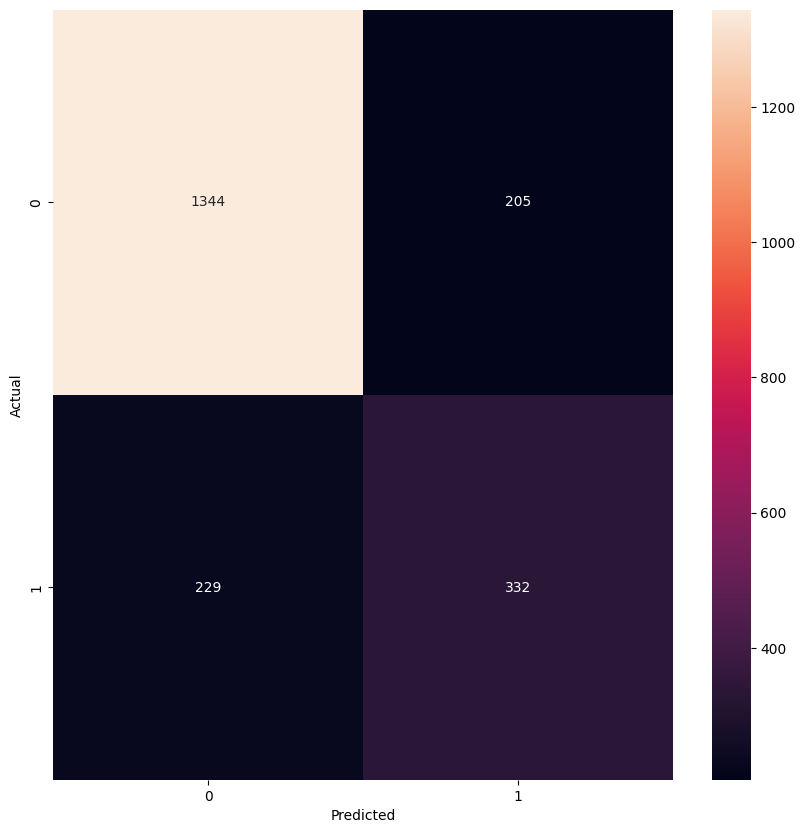

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")